<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass4/hpdp/ATG/ATG_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4

## Group Name: ATONG (ATG)

### Group Members:
| Name                                      | Matrix Number   |
| :---------------------------------------- | :-------------: |
| ANG YI QIN                                |A21EC0163        |
| ALIYA ZARENA BINTI ZAINULANUAR            |A21EC0013        |
| SAM CHIA YUN                              |A21EC0127        |
| MUHAMMAD IQMAL BIN SIS                    |A21EC0080        |


## Step 1: Dataset Selection
#### Overview
Kaggle Website Link: [*Kaggle*](https://www.kaggle.com/)
<br><br>
The first step in this data analysis or machine learning project is to select a suitable dataset. The dataset serves as the foundation for the analysis, and choosing an appropriate one is crucial for the success of the project.
<br><br>
#### Dataset Information
**Name**: **Airline Delay and Cancellation Data, 2018** <br>
**URL**: [*Dataset Link*](https://www.kaggle.com/datasets/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018?select=2018.csv) <br>
**Description**: The "Airline Delay and Cancellation Data (2009-2018)" on Kaggle offers a comprehensive overview of airline performance during the specified decade. It includes features such as flight information, departure and arrival delays, cancellation details, and reasons for disruptions across multiple carriers. Analysts and data scientists can utilize this dataset to explore trends, predict flight delays, and assess the punctuality of different airlines.

## Step 2 : Loading the Dataset

- This command (`!pip install opendatasets`) will install the opendatasets package, which allows to easily download datasets from online sources, including Kaggle, using simple commands in Python.

In [ ]:
!pip install opendatasets

- The code employs the `opendatasets` library to efficiently download the "**Airline Delay and Cancellation Data (2018)**" dataset from Kaggle.

In [6]:
import opendatasets as od
od.download(
    "https://www.kaggle.com/datasets/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018?select=2018.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: angyiqin
Your Kaggle Key: ··········


100%|██████████| 1.95G/1.95G [00:20<00:00, 102MB/s] 


- Import essential libraries for data analysis and visualization.

In [7]:
import numpy as np
import pandas as pd
import collections
import string, sys, os, re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from IPython.display import Image
from functools import reduce
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

- The `pd.read_csv()` function loads the data into a DataFrame called 'df.'
- The `head()` method is then used to display the first few rows of the DataFrame, providing a quick overview of the dataset's structure and content.

In [8]:
# reading the csv file
file =('airline-delay-and-cancellation-data-2009-2018/2018.csv')
df = pd.read_csv(file)

# displaying the contents of the XLSX file
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN


To check the total number of rows and columns, use `df.shape`.

In [9]:
df.shape

(7213446, 28)

## Step 3: Exploratory Data Analysis (EDA)
In this step, we perform basic exploratory data analysis to understand the dataset's characteristics. Check for missing values, examine data types, and get an overview of the dataset's structure and summary statistics.

In [10]:
# Check for missing values
print(df.isnull().sum())

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                112317
DEP_DELAY               117234
TAXI_OUT                115830
WHEELS_OFF              115829
WHEELS_ON               119246
TAXI_IN                 119246
CRS_ARR_TIME                 0
ARR_TIME                119245
ARR_DELAY               137040
CANCELLED                    0
CANCELLATION_CODE      7096862
DIVERTED                     0
CRS_ELAPSED_TIME            10
ACTUAL_ELAPSED_TIME     134442
AIR_TIME                134442
DISTANCE                     0
CARRIER_DELAY          5860736
WEATHER_DELAY          5860736
NAS_DELAY              5860736
SECURITY_DELAY         5860736
LATE_AIRCRAFT_DELAY    5860736
Unnamed: 27            7213446
dtype: int64


- Because there are a significant number of null values, we have opted to **drop the columns**: 'CANCELLATION_CODE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', and 'Unnamed: 27.'

In [11]:
# List of columns to drop
columns_to_drop = ['DIVERTED','CANCELLATION_CODE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Unnamed: 27']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [12]:
df.shape

(7213446, 20)

In [13]:
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,268.0,250.0,225.0,1605.0
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,99.0,83.0,65.0,414.0
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,0.0,134.0,126.0,106.0,846.0
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,-2.0,0.0,190.0,182.0,157.0,1120.0
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,0.0,112.0,106.0,83.0,723.0


> Total number of column is reduced to 20.

- To check for missing values in a DataFrame in Pandas, we can use the `isnull()` method, which returns a DataFrame of the same shape as the input but with True where the data is missing and False where it's not. Then, you can use `sum()` to count the missing values in each column.

In [14]:
# Check for missing values
print(df.isnull().sum())

FL_DATE                     0
OP_CARRIER                  0
OP_CARRIER_FL_NUM           0
ORIGIN                      0
DEST                        0
CRS_DEP_TIME                0
DEP_TIME               112317
DEP_DELAY              117234
TAXI_OUT               115830
WHEELS_OFF             115829
WHEELS_ON              119246
TAXI_IN                119246
CRS_ARR_TIME                0
ARR_TIME               119245
ARR_DELAY              137040
CANCELLED                   0
CRS_ELAPSED_TIME           10
ACTUAL_ELAPSED_TIME    134442
AIR_TIME               134442
DISTANCE                    0
dtype: int64


- To drop rows with null values from the DataFrame, we can use the `dropna()` method.

In [15]:
df.dropna(inplace=True)

In [16]:
# Check for missing values
print(df.isnull().sum())

FL_DATE                0
OP_CARRIER             0
OP_CARRIER_FL_NUM      0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
CANCELLED              0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
dtype: int64


> The data has been effectively cleaned.

In [17]:
df.shape

(7071817, 20)

In [18]:
# Get data types and basic statistics
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7071817 entries, 0 to 7213445
Data columns (total 20 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CRS_ELAPSED_TIME     float64
 17  ACTUAL_ELAPSED_TIME  float64
 18  AIR_TIME             float64
 19  DISTANCE             float64
dtypes: float64(13), int64(3), object(4)
memory usage: 1.1+ GB
None


In [19]:
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,268.0,250.0,225.0,1605.0
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,99.0,83.0,65.0,414.0
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,0.0,134.0,126.0,106.0,846.0
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,-2.0,0.0,190.0,182.0,157.0,1120.0
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,0.0,112.0,106.0,83.0,723.0


- We can use `describe()` to obtain key statistical information about the numerical columns in the dataset. This includes measures such as the mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum values.

In [20]:
print(df.describe())

       OP_CARRIER_FL_NUM  CRS_DEP_TIME      DEP_TIME     DEP_DELAY  \
count       7.071817e+06  7.071817e+06  7.071817e+06  7.071817e+06   
mean        2.596264e+03  1.328552e+03  1.333715e+03  9.902050e+00   
std         1.858259e+03  4.908422e+02  5.045693e+02  4.464612e+01   
min         1.000000e+00  1.000000e+00  1.000000e+00 -1.220000e+02   
25%         1.018000e+03  9.140000e+02  9.160000e+02 -5.000000e+00   
50%         2.119000e+03  1.320000e+03  1.326000e+03 -2.000000e+00   
75%         4.060000e+03  1.735000e+03  1.744000e+03  7.000000e+00   
max         7.909000e+03  2.359000e+03  2.400000e+03  2.710000e+03   

           TAXI_OUT    WHEELS_OFF     WHEELS_ON       TAXI_IN  CRS_ARR_TIME  \
count  7.071817e+06  7.071817e+06  7.071817e+06  7.071817e+06  7.071817e+06   
mean   1.739675e+01  1.357723e+03  1.462093e+03  7.595056e+00  1.485222e+03   
std    9.904040e+00  5.060399e+02  5.332033e+02  6.041841e+00  5.181999e+02   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.00

## Step 4: Feature Selection

#### Correlation Analysis
In this step, we calculate the correlation between each feature and the target variable 'ARR_DELAY'. Features with an absolute correlation coefficient greater than 0.1 are considered relevant and selected for further analysis. This is done to focus on features that have a meaningful relationship with the target variable.

In [21]:
# Assuming 'ARR_DELAY' is the target variable
target_correlation_2018 = df.corr()['ARR_DELAY']
selected_features_2018 = target_correlation_2018[abs(target_correlation_2018) > 0.1].index

# Display selected features
print("Selected Features based on Correlation (2018):")
print(selected_features_2018)

# Create a new DataFrame with selected features
df_selected_2018 = df[selected_features_2018]


<ipython-input-21-156b2e08872d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  target_correlation_2018 = df.corr()['ARR_DELAY']


Selected Features based on Correlation (2018):
Index(['DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'TAXI_IN',
       'ARR_DELAY'],
      dtype='object')


#### Domain Knowledge
Features are included based on domain knowledge for the year 2018. These features are selected because they are considered relevant in the context of airline delays and cancellations. Domain knowledge is crucial in identifying features that are likely to have a significant impact on the target variable.

In [22]:
# Include features based on domain knowledge for the year 2018
domain_features_2018 = [
    'OP_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
    'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'CANCELLED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE'
]
df_selected_2018 = df[domain_features_2018]


##STEP 5 : Feature Preprocessing

#### Handling Missing Values
Missing values in the selected features for the year 2018 are checked, and in this case, rows with missing values are dropped. This decision can be adjusted based on the nature of missing data and the chosen imputation strategy.

In [23]:
# Check for missing values in the selected features for the year 2018
missing_values_2018 = df_selected_2018.isnull().sum()

# Drop rows with missing values (you might use imputation techniques based on your analysis)
df_selected_2018 = df_selected_2018.dropna()


#### Handling Outliers
Outliers in the 'DEP_DELAY' and 'ARR_DELAY' columns of the selected features for the year 2018 are addressed by removing rows with extreme values. This is done to prevent outliers from disproportionately influencing the analysis or machine learning models.

In [24]:
# Handling outliers in the selected features for the year 2018
# For example, removing rows with extreme values in 'DEP_DELAY' and 'ARR_DELAY'
df = df[(df['DEP_DELAY'] < 200) & (df['ARR_DELAY'] < 200)]


#### Normalization
Numeric features in the selected features for the year 2018, such as 'DEP_DELAY' and 'ARR_DELAY', are standardized using StandardScaler. Standardization ensures that these features have a mean of 0 and a standard deviation of 1, which is important for certain machine learning algorithms.

In [25]:
from sklearn.preprocessing import StandardScaler

# Standardize data for the selected numeric features for the year 2018
numeric_features_2018 = ['DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE']

scaler_2018 = StandardScaler()
df[numeric_features_2018] = scaler_2018.fit_transform(df[numeric_features_2018])


##STEP 6 : Feature Transformation

Data transformation in flight analysis is essential for standardizing data formats, handling missing values, and aligning variables with analysis requirements. It enhances the quality and usability of the data by addressing issues such as normalization, noise reduction, and dimensionality reduction.

###Speed Features

This information can be valuable to have clear understanding for the efficiency of flight routes, identifying outliers, or exploring patterns related to different airlines, airports, or time periods.

####1. Calculate the average speed of the flight by dividing distance by air time.


In [26]:
df['SPEED'] = df['DISTANCE'] / df['AIR_TIME']

####2. Logarithmic Transformation

In [27]:
from scipy.stats import skew

speed_skewness = skew(df['SPEED'])
print(f'Skewness of SPEED: {speed_skewness}')

Skewness of SPEED: -0.7064329707643099


In [28]:
df['LOG_SPEED'] = np.log1p(df['SPEED'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


####3. Interaction between Distance and Speed

In [29]:
df['DISTANCE_SPEED_INTERACTION'] = df['DISTANCE'] * df['SPEED']

In [30]:
# Display statistics for the original features and the interaction feature
print(df[['DISTANCE', 'SPEED', 'DISTANCE_SPEED_INTERACTION']].describe())

           DISTANCE         SPEED  DISTANCE_SPEED_INTERACTION
count  7.007161e+06  7.007161e+06                7.007161e+06
mean   8.995607e-17  9.918046e-01                1.648001e-02
std    1.000000e+00  2.432640e+00                1.278570e+00
min   -1.287195e+00 -1.549034e+02               -1.447755e+02
25%   -7.333714e-01  8.643586e-01               -7.703646e-01
50%   -2.813043e-01  9.769140e-01               -2.950450e-01
75%    3.876215e-01  1.128123e+00                4.640652e-01
max    6.973455e+00  1.455266e+02                1.590804e+02


###AirTime Features



####1. Logarithmic Transformation



In [31]:
# Check for case-sensitive column names
print('AIR_TIME' in df.columns)

True


In [32]:
log_air_time_values = np.log1p(df['AIR_TIME'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [33]:
# Create a new column 'LOG_AIR_TIME' in the DataFrame
df['LOG_AIR_TIME'] = log_air_time_values

In [34]:
#Display the result after transformation
print(df[['AIR_TIME', 'LOG_AIR_TIME']].head())

   AIR_TIME  LOG_AIR_TIME
0  1.595090      0.953621
1 -0.654057     -1.061482
2 -0.077713     -0.080899
3  0.639202      0.494210
4 -0.401028     -0.512541


####2. Standardization or Min-Max Scaling



In [35]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization
scaler = StandardScaler()
df['AIR_TIME_STANDARDIZED'] = scaler.fit_transform(df[['AIR_TIME']])

# Min-Max Scaling
minmax_scaler = MinMaxScaler()
df['AIR_TIME_MINMAX_SCALED'] = minmax_scaler.fit_transform(df[['AIR_TIME']])


####3. Interaction between Air Time and other features

In [36]:
df['LOG_AIR_TIME_SPEED_INTERACTION'] = df['LOG_AIR_TIME'] * df['SPEED']

In [37]:
# Set the maximum number of displayed columns to a high number
pd.set_option('display.max_columns', None)

# Display relevant columns including the new interaction feature
print(df[['LOG_AIR_TIME', 'SPEED', 'LOG_AIR_TIME_SPEED_INTERACTION']].head())

# Reset the maximum number of displayed columns to the default value if needed
pd.set_option('display.max_columns', 20)

   LOG_AIR_TIME     SPEED  LOG_AIR_TIME_SPEED_INTERACTION
0      0.953621  0.839115                        0.800198
1     -1.061482  0.991192                       -1.052132
2     -0.080899 -0.930886                        0.075308
3      0.494210  0.828241                        0.409325
4     -0.512541  0.331247                       -0.169778


##STEP 7 : Feature Creation

Feature creation in flight analysis involves generating new variables or transforming existing ones to provide additional insights. This process enhances the dataset by deriving meaningful metrics, such as speed from position coordinates or fuel efficiency, to aid in comprehensive analysis.

###Creating Time of Day Categories
We can analyze more the departure and arrival time by extracting the data from from the scheduled one which it will turns into hour or minutes. It can be useful for capturing time-related patterns more granularly.

#### 1. Convert to Datetime Format
Make sure both of your time is already in DATETIME datatype before proceeding to extraction for better manipulation.

In [38]:
# Check the data types of 'CRS_DEP_TIME'' and 'CRS_ARR_DATETIME'
dep_datetime_data_type = df['CRS_DEP_TIME'].dtype
arr_datetime_data_type = df['CRS_ARR_TIME'].dtype

# Print the results
print(f'Data type of CRS_DEP_TIME: {dep_datetime_data_type}')
print(f'Data type of CRS_ARR_TIME: {arr_datetime_data_type}')

Data type of CRS_DEP_TIME: int64
Data type of CRS_ARR_TIME: int64


In [39]:
# Display the data for 'CRS_ARR_TIME' and 'CRS_DEP_TIME' columns
time_columns = df[['CRS_ARR_TIME', 'CRS_DEP_TIME']]
print(time_columns.head())

   CRS_ARR_TIME  CRS_DEP_TIME
0          1745          1517
1          1254          1115
2          1649          1335
3          1756          1546
4           922           630


In [40]:
 # Select the first 1000 rows for testing

small_df = df.head(1000)
df['CRS_ARR_TIME'] = df['CRS_ARR_TIME'].astype('uint16')
df['CRS_DEP_TIME'] = df['CRS_DEP_TIME'].astype('uint16')

In [41]:
 # Include only necessary columns
 df = df[['FL_DATE', 'CRS_DEP_TIME', 'CRS_ARR_TIME']]

In [42]:
# Drop rows with missing or inconsistent time data
df = df.dropna(subset=['FL_DATE', 'CRS_DEP_TIME', 'CRS_ARR_TIME'])

# Convert to datetime with zfill and format
df['CRS_DEP_DATETIME'] = pd.to_datetime(df['FL_DATE'].astype(str) + df['CRS_DEP_TIME'].astype(str).str.zfill(4), format='%Y-%m-%d%H%M', errors='coerce')
df['CRS_ARR_DATETIME'] = pd.to_datetime(df['FL_DATE'].astype(str) + df['CRS_ARR_TIME'].astype(str).str.zfill(4), format='%Y-%m-%d%H%M', errors='coerce')


#### 2. Extract Time By Hour and Minutes

This step involves converting the 'CRS_DEP_TIME' and 'CRS_ARR_TIME' columns to datetime format. Then, temporal features such as the departure hour ('DepHour') and arrival hour ('ArrHour') are extracted. The original time columns are dropped, leaving only the newly extracted features.

In [43]:
#Create new columns for both departure and arrival's hour and minutes

df['DEP_HOUR'] = df['CRS_DEP_DATETIME'].dt.hour
df['DEP_MINUTE'] = df['CRS_DEP_DATETIME'].dt.minute

df['ARR_HOUR'] = df['CRS_ARR_DATETIME'].dt.hour
df['ARR_MINUTE'] = df['CRS_ARR_DATETIME'].dt.minute

In [44]:
# Display if the departure time is during the day or night
df['DEP_TIME_OF_DAY'] = pd.cut(df['DEP_HOUR'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])

# Display if the arrival time is during the day or night
df['ARR_TIME_OF_DAY'] = pd.cut(df['ARR_HOUR'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])


In [45]:
# Display the result
selected_columns = ['ARR_TIME_OF_DAY', 'CRS_DEP_TIME', 'DEP_TIME_OF_DAY', 'CRS_ARR_TIME']
print(df[selected_columns])

        ARR_TIME_OF_DAY  CRS_DEP_TIME DEP_TIME_OF_DAY  CRS_ARR_TIME
0             Afternoon          1517       Afternoon          1745
1               Morning          1115         Morning          1254
2             Afternoon          1335       Afternoon          1649
3             Afternoon          1546       Afternoon          1756
4               Morning           630           Night           922
...                 ...           ...             ...           ...
7213441       Afternoon          1534       Afternoon          1714
7213442         Evening          1751       Afternoon          1952
7213443         Evening          2015         Evening          2107
7213444       Afternoon          1300       Afternoon          1350
7213445       Afternoon          1435       Afternoon          1546

[7007161 rows x 4 columns]


###Flight Duration Features

This feature represents the scheduled duration of the flight as per the computerized reservation system by creating new column *CRS_FLIGHT_DURATION_HOURS*

In [46]:
print(df.columns)

Index(['FL_DATE', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'CRS_DEP_DATETIME',
       'CRS_ARR_DATETIME', 'DEP_HOUR', 'DEP_MINUTE', 'ARR_HOUR', 'ARR_MINUTE',
       'DEP_TIME_OF_DAY', 'ARR_TIME_OF_DAY'],
      dtype='object')


In [47]:
df['CRS_FLIGHT_DURATION_HOURS'] = (df['CRS_ARR_DATETIME'] - df['CRS_DEP_DATETIME']).dt.total_seconds() / 3600

In [48]:
#This will print the first 1000 values from the 'CRS_FLIGHT_DURATION_HOURS' column in your DataFrame.
print(df['CRS_FLIGHT_DURATION_HOURS'].head(1000))

0       2.466667
1       1.650000
2       3.233333
3       2.166667
4       2.866667
          ...   
1008    2.316667
1009    5.616667
1010    1.133333
1011    3.200000
1012    2.233333
Name: CRS_FLIGHT_DURATION_HOURS, Length: 1000, dtype: float64


##STEP 8 : Visualization


Feature visualization in flight analysis is crucial for representing complex data patterns and relationships graphically, aiding in the interpretation of information. It involves creating visual representations, such as charts or graphs, to effectively communicate patterns, trends, and anomalies within the dataset.

### Line Plot of Flight Duration Over Time

It shows how the flight duration varies over time(hours) for the selected subset of data. Each point on the line corresponds to a specific scheduled departure datetime, and the vertical position indicates the corresponding flight duration. Patterns, trends, or anomalies in the data can be visually inspected.


In [49]:
print(df.columns)

print(df.info())

Index(['FL_DATE', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'CRS_DEP_DATETIME',
       'CRS_ARR_DATETIME', 'DEP_HOUR', 'DEP_MINUTE', 'ARR_HOUR', 'ARR_MINUTE',
       'DEP_TIME_OF_DAY', 'ARR_TIME_OF_DAY', 'CRS_FLIGHT_DURATION_HOURS'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7007161 entries, 0 to 7213445
Data columns (total 12 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   FL_DATE                    object        
 1   CRS_DEP_TIME               uint16        
 2   CRS_ARR_TIME               uint16        
 3   CRS_DEP_DATETIME           datetime64[ns]
 4   CRS_ARR_DATETIME           datetime64[ns]
 5   DEP_HOUR                   int64         
 6   DEP_MINUTE                 int64         
 7   ARR_HOUR                   float64       
 8   ARR_MINUTE                 float64       
 9   DEP_TIME_OF_DAY            category      
 10  ARR_TIME_OF_DAY            category      
 11  CRS_FLIGHT_DURATION_HOURS

In [50]:
import matplotlib
import matplotlib.pyplot as plt

#Increase agg.path.chunksize
plt.rcParams['agg.path.chunksize'] = 20000

#Increase path.simplify_threshold
plt.rcParams['path.simplify_threshold'] = 0.2


In [51]:
# Select the first 1000 rows of the DataFrame as a subset
subset_df = df.head(1000)[['CRS_DEP_DATETIME', 'CRS_FLIGHT_DURATION_HOURS']].sort_values("CRS_DEP_DATETIME")

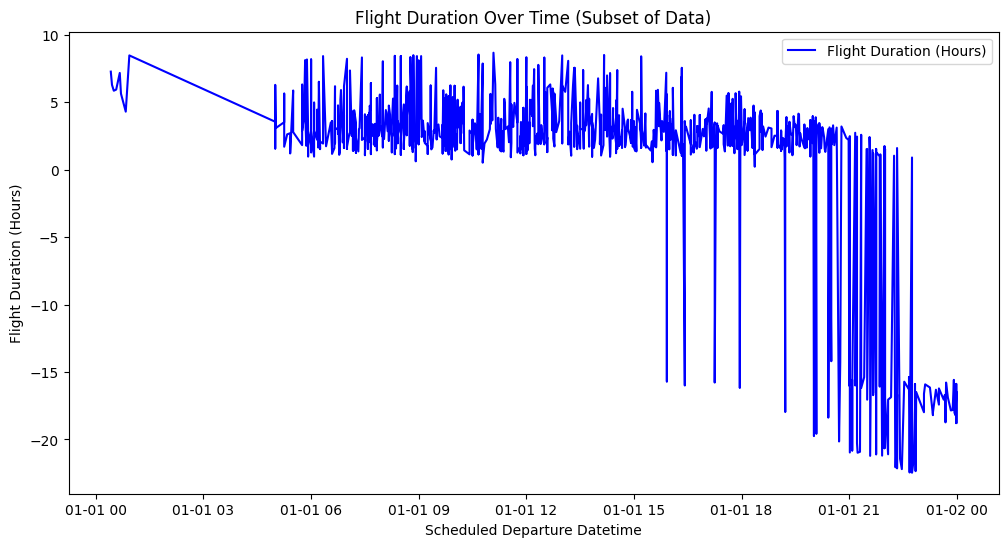

In [52]:
# Line plot of flight duration over time for the subset
plt.figure(figsize=(12, 6))
plt.plot(subset_df['CRS_DEP_DATETIME'], subset_df['CRS_FLIGHT_DURATION_HOURS'], label='Flight Duration (Hours)', color='blue')
plt.xlabel('Scheduled Departure Datetime')
plt.ylabel('Flight Duration (Hours)')
plt.title('Flight Duration Over Time (Subset of Data)')
plt.legend()

###Box Plot of Flight Duration by Time of Day

This visualization helps in understanding how flight durations vary during different times of the day and whether there are notable differences or patterns in the distribution.








Text(0.5, 1.0, 'Flight Duration by Time of Day')

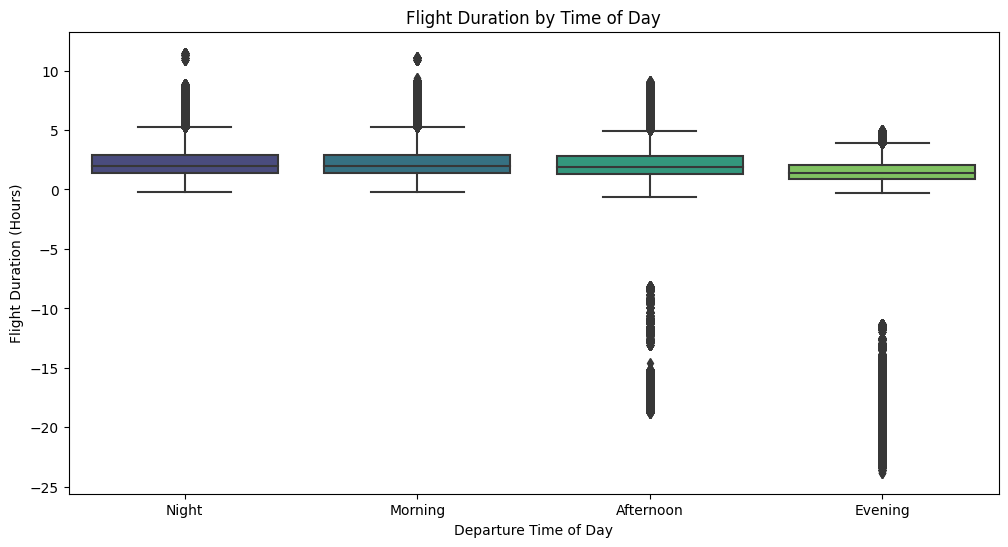

In [53]:
import seaborn as sns

# Box plot of flight duration by time of day
plt.figure(figsize=(12, 6))
sns.boxplot(x='DEP_TIME_OF_DAY', y='CRS_FLIGHT_DURATION_HOURS', data=df, palette='viridis')
plt.xlabel('Departure Time of Day')
plt.ylabel('Flight Duration (Hours)')
plt.title('Flight Duration by Time of Day')


###Histogram of Monthly Flight Durations

It visualizes the distribution of flight durations, showing how frequently different durations occur in the dataset.


Text(0.5, 1.0, 'Distribution of Flight Durations')

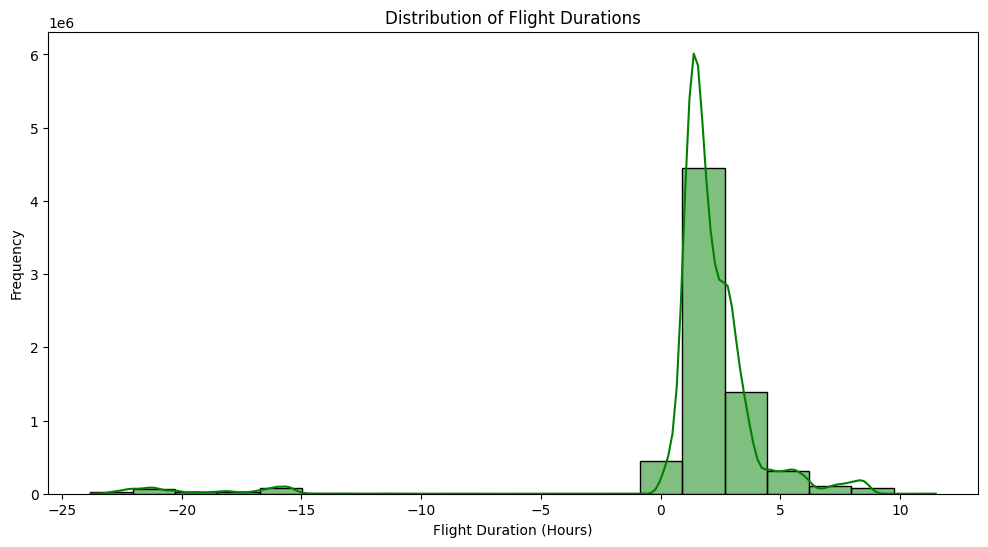

In [54]:
# Set the size of the figure
plt.figure(figsize=(12, 6))

# Use Seaborn's histplot function to create a histogram
sns.histplot(df['CRS_FLIGHT_DURATION_HOURS'], bins=20, kde=True, color='green')

# Add labels to the x and y axes
plt.xlabel('Flight Duration (Hours)')
plt.ylabel('Frequency')

# Add a title to the plot
plt.title('Distribution of Flight Durations')


Text(0.5, 1.0, 'Distribution of Flight Durations')

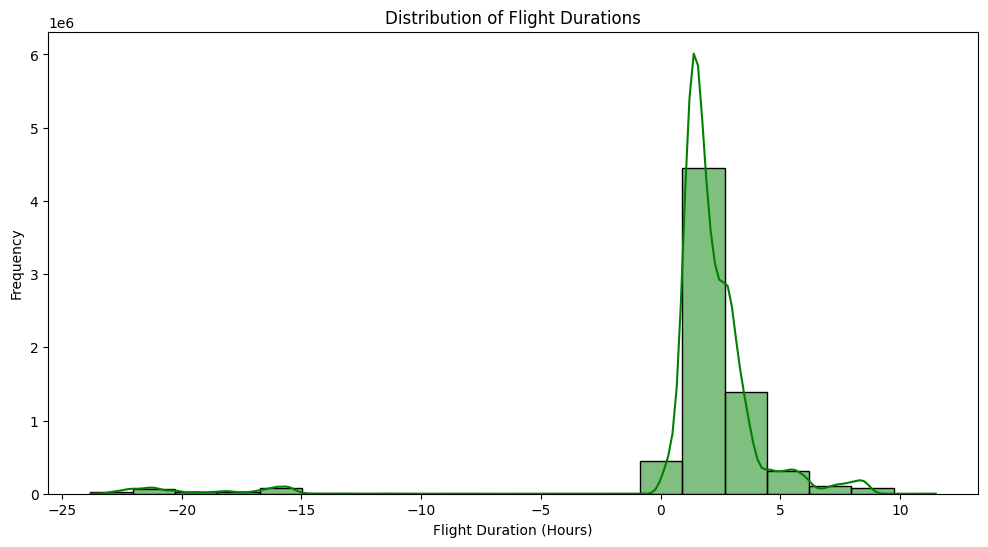

In [55]:

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Use Seaborn's histplot function to create a histogram
sns.histplot(data = df, x = 'CRS_FLIGHT_DURATION_HOURS', bins=20, kde=True, color='green')

# Add labels to the x and y axes
plt.xlabel('Flight Duration (Hours)')
plt.ylabel('Frequency')

# Add a title to the plot
plt.title('Distribution of Flight Durations')


### Correlation Heatmap


Text(0.5, 1.0, 'Correlation Heatmap')

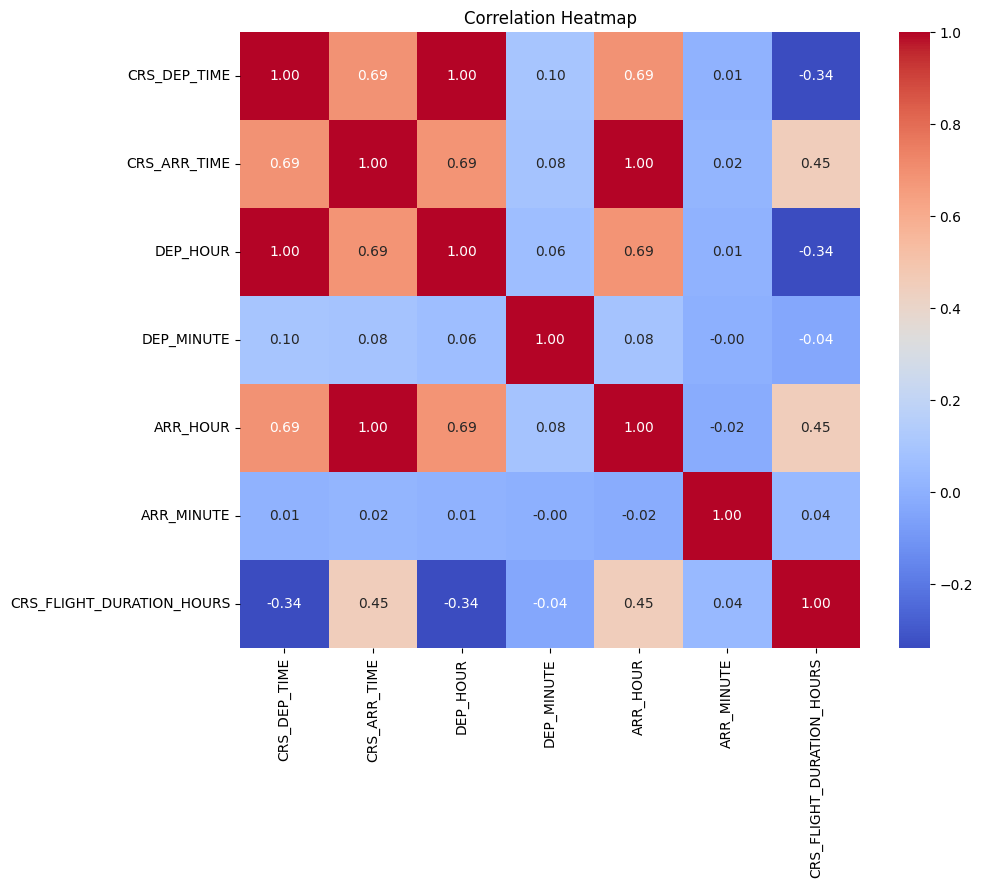

In [56]:
# Set the size of the figure
plt.figure(figsize=(10, 8))

# Use Seaborn's heatmap function to create a correlation heatmap
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Add a title to the plot
plt.title('Correlation Heatmap')


##STEP 9 : Conclusion



- The Python script successfully loads the "Airline Delay and Cancellation Data (2018)" dataset into a Pandas DataFrame.
- This sets the stage for further analysis, enabling the exploration of patterns, trends, and insights related to airline delays and cancellations in the specified year.
- The chosen libraries, such as Pandas for data manipulation and visualization tools like Matplotlib, Seaborn, and Plotly, suggest a comprehensive approach to understanding and presenting the dataset's information.
<br>

- In this feature engineering process, we systematically addressed key steps to enhance the quality of the dataset and prepare it for further analysis or machine learning modeling. The chosen dataset, focusing on airline delay and cancellation data for the year 2018, underwent a series of transformations to extract meaningful information and improve its suitability for predictive modeling.
<br>

- Flight Duration

    Based on the analysis been made, the flight durations range are from approximately 1.13 hours to 5.62 hours.
    
    - Scheduling and Planning:

    > Airlines use flight duration information for scheduling and planning purposes. It influences decisions on route planning, crew scheduling, and optimizing resources.

    - Passenger Experience:

    > Passengers rely on accurate flight duration information when planning their journeys. Knowing the expected duration helps passengers schedule connecting flights, plan layovers, and organize ground transportation at their destination.


- Flight Management

    Most flights adhere to the scheduled time of day for departures and arrivals. However, anomalies exist, such as flights scheduled in the morning but departing at night, suggesting potential delays or rescheduling. Identifying such variations is crucial for understanding operational efficiency and punctuality in the airline industry.

    - Operational Planning:

    > The data can be used for future operational planning. For example, if certain times of day consistently experience delays, the airline can adjust scheduling or allocate additional resources during those periods.

    - Departure and Arrival Delays:

    > Differences between *CRS_DEP_TIME* and *DEP_TIME*, as well as *CRS_ARR_TIME* and *ARR_TIME*, represent potential delays. Analyzing these delays can help identify areas for improvement in terms of operational efficiency and punctuality.
